downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


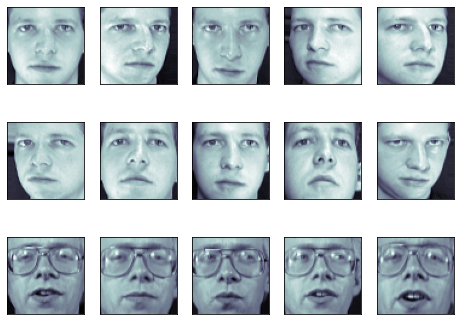

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
faces = datasets.fetch_olivetti_faces()
faces.data.shape

fig=plt.figure(figsize=(8,6))

for i in range(15):
  ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(faces.data,faces.target,random_state=0)
print(X_train.shape,X_test.shape)

(300, 4096) (100, 4096)


(150, 4096)


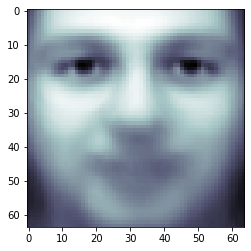

In [3]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)
print(pca.components_.shape)

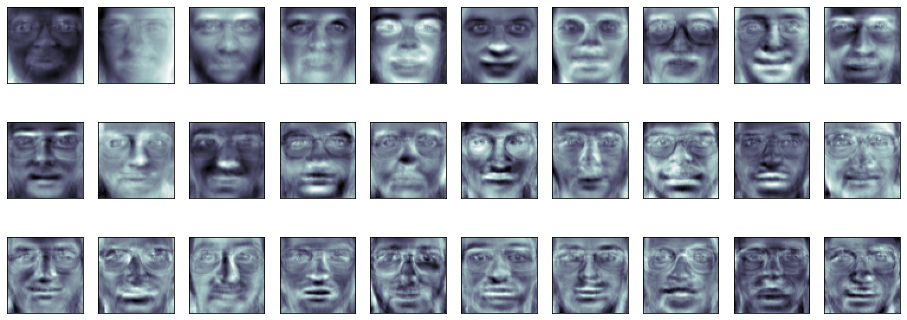

In [4]:
fig=plt.figure(figsize=(16,6))
for i in range(30):
  ax=fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

In [5]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


In [6]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_pca,y_train)

GaussianNB()

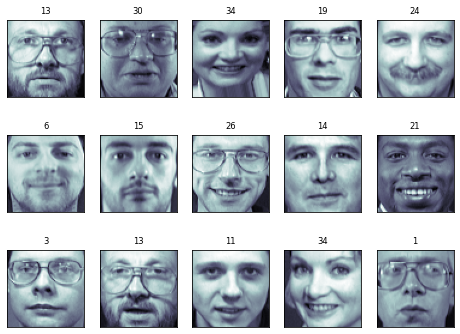

In [7]:
import numpy as np
fig=plt.figure(figsize=(8,6))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)
  y_pred=gnb.predict(X_test_pca[i,np.newaxis])[0]
  color=('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred,fontsize='small',color=color)

In [8]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.11      1.00      0.20         1
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [9]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [10]:
from sklearn.pipeline import Pipeline
clf=Pipeline([('pca',decomposition.PCA(n_components=150,whiten=True)),
              ('gnb',GaussianNB())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(metrics.confusion_matrix(y_pred,y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


# Exercise

##1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.50      1.00      0.67         2
           2       0.50      0.50      0.50         2
           3       1.00      0.17      0.29         6
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      1.00      0.80         2
           9       1.00      0.14      0.25         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      0.75      0.86         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

## 2.Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations.

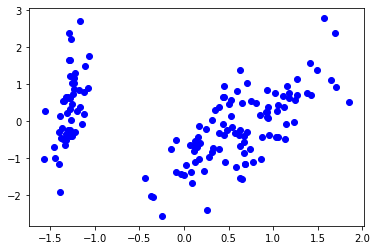

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris.data,iris.target,random_state=0)
pca=decomposition.PCA(n_components=4, whiten=True).fit_transform(iris.data)
ax=plt.plot(pca[:,0],pca[:,1],'bo')

## 3.Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system.

In [13]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
iris = datasets.load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris.data,iris.target,random_state=0)
pca=decomposition.PCA(n_components=2, whiten=True)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

gnb=GaussianNB()
gnb.fit(X_train_pca,y_train)
y_pred=gnb.predict(X_test_pca)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.62      0.77        16
           2       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


## 4.Replace Naive Bayes Classifier with Decision Tree Classifier and then Support Vector Machine and compare performance of all three of them.

In [14]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
iris = datasets.load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris.data,iris.target,random_state=0)
pca=decomposition.PCA(n_components=2, whiten=True)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

clf=DecisionTreeClassifier()
clf.fit(X_train_pca,y_train)
y_pred=clf.predict(X_test_pca)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.56      0.69        16
           2       0.53      0.89      0.67         9

    accuracy                           0.79        38
   macro avg       0.81      0.82      0.79        38
weighted avg       0.85      0.79      0.79        38

[[13  0  0]
 [ 0  9  7]
 [ 0  1  8]]
